In [1]:
import numpy as np                              #used for working with arrays and also mathematical functions
import pandas as pd                             #used for data manipulation and analysis
from sklearn import datasets,metrics,cluster    #sklearn is simple and efficient library for predictive data analisys
import matplotlib.pyplot as plt                 #used for creating static, animated, and interactive visualizations


In [2]:
#reading data
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns= iris.feature_names)         #a 2D labeled data structure with columns of different types

In [3]:
#diving into the data
data.head(150) #returns first n rows of dataFrame.default value is 5.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
data.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<function matplotlib.pyplot.show(close=None, block=None)>

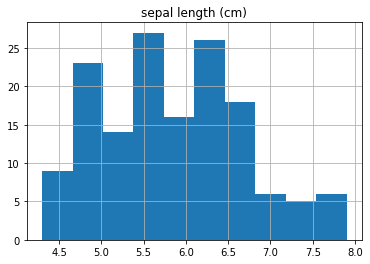

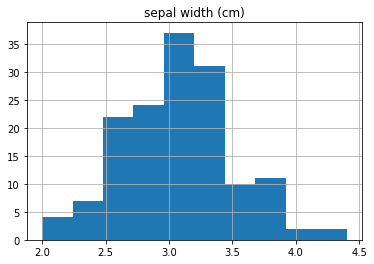

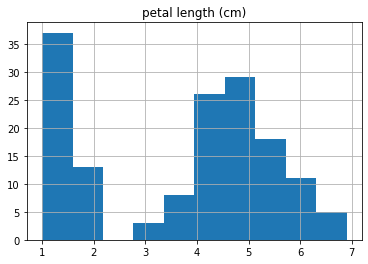

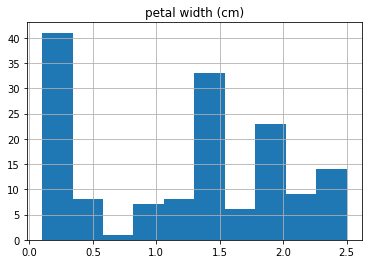

In [6]:
data.hist(column='sepal length (cm)')
plt.show
data.hist(column='sepal width (cm)')
plt.show
data.hist(column='petal length (cm)')
plt.show
data.hist(column='petal width (cm)')
plt.show

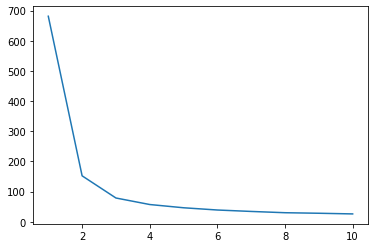

In [7]:
#Finding the optimum number of clusters
Centroid_list =[]
no_of_clusters = range(1,11)

for i in no_of_clusters :
    kmeans = cluster.KMeans(n_clusters = i, init ='k-means++',max_iter = 300,n_init = 10,random_state = 0)
    kmeans.fit(data.values)
    Centroid_list.append(kmeans.inertia_)
    
plt.plot(no_of_clusters,Centroid_list)
plt.show()

In [8]:
#This is the "Elbow Curve Method".Is the most widely used method to indentify the optimum number of clusters 
#The basic idea is for each K value, we calculate the average distance to the centroid across all data points 
#The curve looks like an elbow. When the average distance to the centroid dosen`t decrease significantly with every iteration, thats the optimum number of clusters.in the plot we have, the elbow is at  k = 3

In [31]:
#training and prediction

kmeans = cluster.KMeans(n_clusters = 4, init ='k-means++',max_iter = 300,n_init = 10,random_state = 0)
centroid=kmeans.fit_predict(data.values)

print(centroid)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


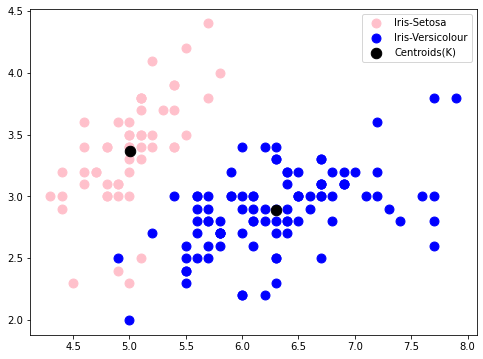

In [32]:
plt.figure(figsize = (8,6))

plt.scatter(data.values[centroid == 0,0], data.values[centroid == 0,1],s = 80, c='pink', label = 'Iris-Setosa')
plt.scatter(data.values[centroid == 1,0], data.values[centroid == 1,1],s = 80, c='blue', label = 'Iris-Versicolour')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 110, c= 'black', label = 'Centroids(K)')

plt.legend()